# Analysis for gender similarities post

I'm writing a post on Medium about the bad science in James Damore's [sexist manifesto](https://assets.documentcloud.org/documents/3914586/Googles-Ideological-Echo-Chamber.pdf). In the post I'm examining the science behind gender differences and how Damore misrepresented the research to support his sexist viewpoint.

In [118]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erf

### Gender ratio

This is the probablity that any given man will have a score higher than any given woman. You can also interpret this as the percentage of men greater than 50% of women.

$$
P(M > W) = P(M - W > 0)
$$

Since the distributions for men and woman are normal distributions, the difference is another normal distribution $P(D)$ with mean $\mu_D = \mu_M - \mu_W$ and standard deviation $\sigma_D^2 = \sigma_M^2 + \sigma_W^2$. So, we're interested in

$$
P(D) > 0
$$

We can use the cumulative density function to find this easily. The function is
$$
F(x) = \frac{1}{2}\left[1+\mathrm{erf}\left(\frac{x - \mu_D}{\sigma_D \sqrt{2}}\right) \right]
$$

where $\mathrm{erf}$ is the error function. We want $P(D )> 0$ which corresponds to $F(0)$


In [75]:
def ratio(d):
    p = 100*0.5*(1+erf(d/(2*np.sqrt(2))))
    return (p, 100-p)

### Effect size $r^2$

Our data is in the form of Cohen's d for effect sizes. These are differences relative to the standard deviation 
$$
d = \frac{\mu_M - \mu_W}{\sigma}
$$

Another way to consider is with Pearson's coeffecient $r^2$. We can find $r^2$ from d,

$$
r^2 = \frac{d^2}{d^2 + 4}
$$

In [76]:
def rsq(d):
    return 100*d**2/(d**2+4)

In [79]:
d = -0.91
print('Ratio: {:0.1f}:{:0.1f}'.format(*ratio(d)))
print('r^2: {:0.1f}'.format(rsq(d)))

Ratio: 32.5:67.5
r^2: 17.2


## Data entry time

Data is from [Hyde (2005)](https://www.ncbi.nlm.nih.gov/pubmed/16173891).

In [105]:
var = [
'Mathematics computation', 'Mathematics concepts' ,'Mathematics problem solving',
'Reading comprehension','Vocabulary', 'Mathematics',
'Perceptual speed', 'Science', 'Spatial ability',
'Mathematics self-confidence', 'Mathematics anxiety', 'DAT spelling',
'DAT language', 'DAT verbal reasoning', 'DAT abstract reasoning', 
'DAT numerical ability', 'DAT perceptual speed',
'DAT mechanical reasoning', 'DAT space relations',
'Vocabulary', 'Reading comprehension', 'Speech production',
'Spatial perception', 'Mental rotation', 'Spatial visualization',
'Spatial perception', 'Mental rotation', 'Spatial visualization',
'Progressive matrices', 'Progressive matrices', 'Progressive matrices',
'Attribution of success to ability',
'Attribution of success to effort', 'Attribution of success to task',
'Attribution of success to luck', 'Attribution of failure to ability',
'Attribution of failure to effort', 'Attribution of failure to task',
'Attribution of failure luck', 'Interruptions in conversation',
'Intrusive interruptions', 'Talkativeness', 'Affiliative speech',
'Assertive speech', 'Self-disclosure (all studies)', 
'Self-disclosure to stranger', 'Self-disclosure to friend',
'Smiling', 'Smiling: Aware of being observed', 
'Smiling: Not aware of being observed',
'Aggression (all types)', 'Physical aggression (Hyde)', 'Verbal aggression',
'Aggression (Eagly)', 'Physical aggression (Eagly)', 'Psychological aggression (Eagly)',
'Physical aggression (Knight)', 'Verbal aggression (Knight)',
'Aggression in low emotional arousal context', 'Aggression in emotional arousal context',
'Aggression under provocation', 'Aggression under neutral conditions',
'Negotiation outcomes', 'Negotiator competitiveness', 'Helping behavior',
'Helping: Surveillance context', 'Helping: No surveillance',
'Sexuality: Masturbation', 'Sexuality: Attitudes about casual sex', 'Sexual satisfaction',
'Attitudes about extramarital sex', 'Arousal to sexual stimuli',
'Leadership: Evaluation', 'Leadership effectiveness',
'Leadership: Transformational', 'Leadership: Laissez-faire',
'Neuroticism: Anxiety', 'Neuroticism: Impulsiveness', 'Extraversion: Gregariousness',
'Extraversion: Assertiveness', 'Extraversion: Activity', 'Openness',
'Agreeableness: Trust', 'Agreeableness: Tendermindedness', 'Conscientiousness',
'Self-esteem (Kling)', 'Self-esteem (Major)',  'Body esteem',
'Depression symptoms ', 'Life satisfaction (Wood)', 'Happiness',
'Life satisfaction(P&S)', 'Self-esteem (P&S)', 'Happiness (P&S)',
'Coping: Problem-focused', 'Coping: Rumination',
'Balance', 'Grip strength', 'Throw velocity', 'Throw distance',
'Vertical jump', 'Sprinting', 'Flexibility',
'Activity level', 'Moral reasoning: Stage', 'Moral reasoning: Justice orientation',
'Moral reasoning: Care orientation', 'Delay of gratification',
'Cheating behavior', 'Cheating attitudes',
'Computer use: Current', 'Computer self-efficacy',
'Job attribute preference: Earnings', 'Job attribute preference: Security',
'Job attribute preference: Challenge', 'Job attribute preference: Physical work environment',
'Job attribute preference: Power'
]

In [106]:
ds = """-0.14  -0.03  0.08 -0.09  0.06  0.16  -0.28  0.32  0.19 0.16  -0.15
-0.45  -0.40  -0.02  -0.04  -0.10  -0.34  0.76  0.15
-0.02  -0.03  -0.33
0.44  0.73  0.13
0.44  0.56  0.19
0.02  0.16  0.30
0.13  -0.04  -0.01  -0.07  0.16  0.15  -0.08  -0.15
 0.15  0.33
 -0.11  -0.26  0.11
  -0.18  -0.07  -0.28
 -0.40  -0.46  -0.19
 0.50  0.60  0.43
 0.29  0.40  0.18
 0.59  0.28  0.30  0.56
 0.17  0.33
  0.09  0.07
 0.13  0.74  -0.02
 0.96  0.81  -0.06  0.29
 0.31
  0.05  -0.02  -0.10  0.16
-0.32  -0.01  -0.07  0.51  0.08  0.19  -0.35  -0.91  -0.18
 0.21
 0.14
 0.58
 0.02
 -0.03  -0.07
 0.08  0.08  -0.06
 -0.13  -0.19
 0.09  0.66  2.18  1.98  0.18  0.63  -0.29
 0.49
  -0.21
 0.19  -0.28
 -0.12  0.17
 0.35
 0.33  0.41
 0.12  -0.02  0.05  -0.13  0.04
"""

In [107]:
variables = dict(zip(var, [float(each) for each in ds.split()]))

In [ ]:
variables

In [109]:
rsqrs = {var: rsq(val) for var, val in variables.items()}
ratios = {var: ratio(val) for var, val in variables.items()}
ratios['Science']

In [116]:
from scipy.stats import norm

In [283]:
variables['Science']

0.32

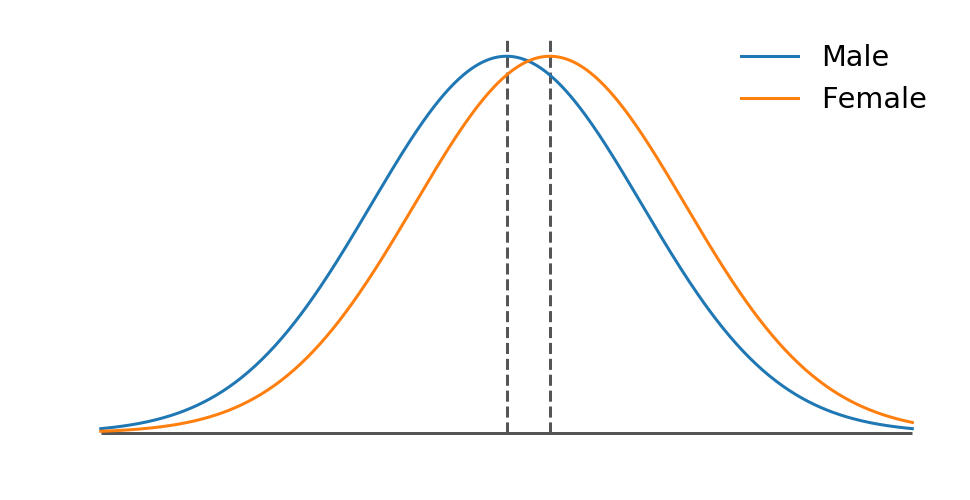

In [282]:
x = np.linspace(-3, 3, num=500)
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x, norm().pdf(x), label='Male')
ax.plot(x, norm(loc=variables['Science']).pdf(x), label='Female')
_, ymax = plt.ylim()
ax.vlines(0, 0, ymax, linestyle='--', color='#555555')
ax.vlines(variables['Science'], 0, ymax, linestyle='--', color='#555555')
ax.hlines(0, -3, 3, color='#555555')
#ax.set_title('Science', fontsize='xx-large')
ax.legend(frameon=False, fontsize='x-large')
plt.axis('off');

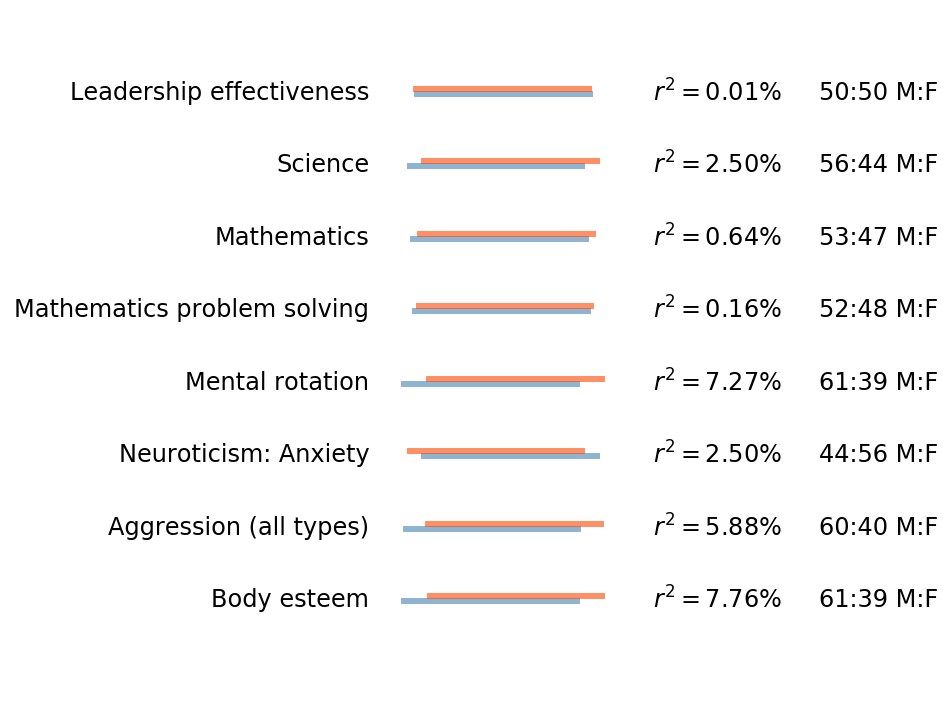

In [284]:
# Choose your own variables to look at here.
vs = ['Leadership effectiveness', 'Science', 'Mathematics', 
      'Mathematics problem solving', 'Mental rotation',
      'Neuroticism: Anxiety', 'Aggression (all types)', 'Body esteem',]
fig, ax = plt.subplots(figsize=(4,6))
for yy, v in enumerate(reversed(vs)):
    d = variables[v]
    ax.hlines(yy, -2-d/2, 2-d/2, color='steelblue', lw=3, alpha=0.6)
    ax.hlines(yy+0.07, -2+d/2, 2+d/2, color='orangered', lw=3, alpha=0.6)
    ax.text(-3, yy+0.02, v, horizontalalignment='right', 
            verticalalignment='center', fontsize='large')
    ax.text(6.25, yy+0.02, '$r^2 = {:.2f}\%$'.format(rsqrs[v]), 
            horizontalalignment='right', 
            verticalalignment='center', fontsize='large')
    ax.text(9.75, yy+0.02, '{:.0f}:{:.0f} M:F'.format(*ratios[v]), 
            horizontalalignment='right', 
            verticalalignment='center', fontsize='large')
ax.set_ylim(-1, len(vs))
ax.set_xlim(-3, 7)
plt.axis('off');

In [230]:
fig.savefig('test.png', dpi=300)

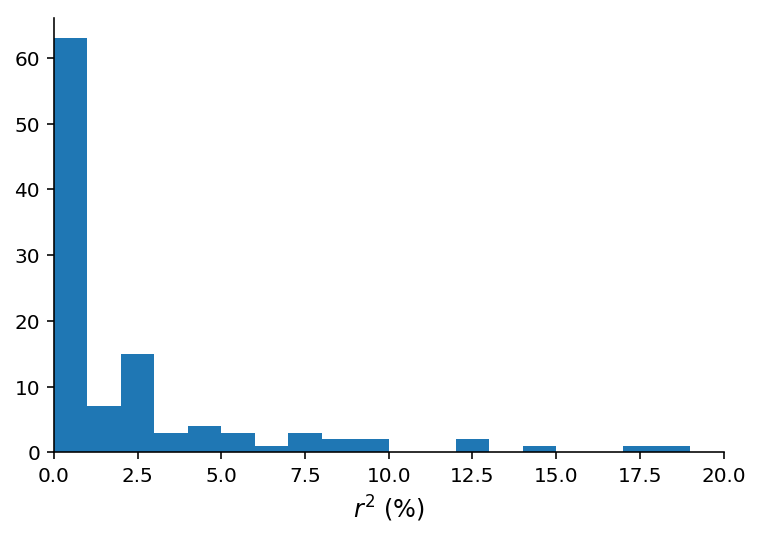

In [280]:
fig, ax = plt.subplots()
ax.hist(list(rsqrs.values()), range=(0, 100), bins=100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0,20)
ax.set_xlabel('$r^2$ (%)', fontsize='large');

In [281]:
fig.savefig('rsqr_dist.png', dpi=200)

In [291]:
for r in [1, 2, 3]:
    p = np.mean(np.array(list(rsqrs.values()))<r)
    print(f'{p:.2f} of variables < r^2 = {r}%')

0.57 of variables < r^2 = 1%
0.64 of variables < r^2 = 2%
0.77 of variables < r^2 = 3%
